In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
x1 = np.random.random(100)*10
x2 = np.random.random(100)*10

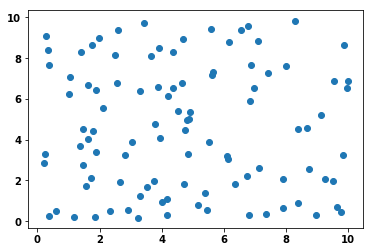

In [3]:
plt.scatter(x1,x2)

In [4]:
from collections import defaultdict

In [5]:
node_info = {}

In [6]:
# 建立节点信息字典
for i in range(100):
    node_info[i]=(x1[i],x2[i])

In [7]:
node_info

{0: (9.822836588404463, 3.2514971704055284),
 1: (1.98676605162583, 9.001862571636776),
 2: (6.3523716091383955, 1.8151310283067768),
 3: (1.3721441039563076, 3.6826124283737336),
 4: (4.718398452982244, 1.8306887960971696),
 5: (6.15520145563851, 8.772276441478565),
 6: (6.882499677080645, 7.677516152614853),
 7: (1.845612021960582, 0.18886202495616788),
 8: (8.386372777037787, 4.508783106818917),
 9: (8.738893465769635, 2.5655338041916878),
 10: (6.128249683289704, 3.0747018489610625),
 11: (0.3700824159291971, 7.682407532754957),
 12: (1.6142040040285743, 4.053669492396519),
 13: (3.3181276024500517, 6.397718419756383),
 14: (5.184925098186759, 0.7912718232227578),
 15: (8.384980471208959, 0.8999666193996825),
 16: (2.582251800029256, 9.37303383590697),
 17: (9.13808128348882, 5.19897531419071),
 18: (6.558759216268068, 9.380905550209933),
 19: (4.171185152541904, 0.30269708888502667),
 20: (5.608735738100888, 7.16997306115927),
 21: (1.181104281159998, 0.18829783957493573),
 22: (5

In [8]:
# 直线距离
def distance(node1,node2):
    x1,y1 = node_info[node1]
    x2,y2 = node_info[node2]
    return ((x1-x2)**2 + (y1-y2)**2)**0.5

In [9]:
distance(7,2)

4.791203695093553

In [10]:
# 节点距离低于阈值则建立联系
def build_relationship(node_infor,threshold):
    rela_graph = defaultdict(list)
    for i in range(len(node_infor)):
        for j in range(len(node_infor))[i+1:]:
            if distance(i,j)<threshold:
                rela_graph[i].append(j)
                rela_graph[j].append(i)
    return rela_graph

In [11]:
rela_info = build_relationship(node_info,1)

In [12]:
rela_info

defaultdict(list,
            {1: [16, 37, 47, 67],
             16: [1, 72],
             37: [1, 47],
             47: [1, 37, 67],
             67: [1, 47],
             2: [74],
             74: [2, 32],
             3: [12, 24, 35, 54, 71],
             12: [3, 24, 35, 71],
             24: [3, 12, 35],
             35: [3, 12, 24],
             54: [3, 33, 71],
             71: [3, 12, 52, 54],
             4: [56, 59, 64],
             56: [4, 14, 70],
             59: [4, 46, 64, 78],
             64: [4, 19, 46, 59, 78, 88],
             5: [18, 69, 80],
             18: [5, 45, 69, 80],
             69: [5, 18, 45],
             80: [5, 18],
             6: [48],
             48: [6, 82, 89],
             7: [21, 94],
             21: [7, 26, 28],
             94: [7, 39, 50],
             8: [25],
             25: [8, 17],
             9: [36, 51, 99],
             36: [9, 51],
             51: [9, 36],
             99: [9, 32],
             10: [31, 91],
             31: [1

In [13]:
import networkx as nx

In [14]:
node_with_road = nx.Graph(rela_info)
# 将字典图信息转化为图

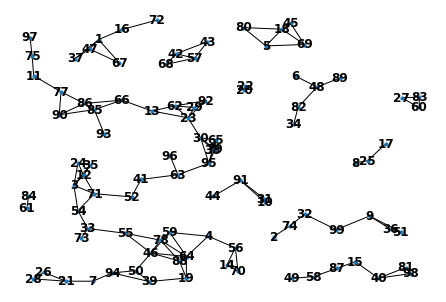

In [15]:
nx.draw(node_with_road,node_info,with_labels=True,node_size=10)
# 参数 图 坐标信息 是否显示标签 节点大小

## 一个快递员遍历所有接节点

In [16]:
a1,a2 = random.random()*10,random.random()*10

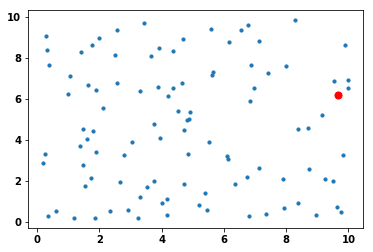

In [17]:
plt.scatter(a1,a2,color='red',s=50)
plt.scatter(x1,x2,s=10)

In [18]:
def find_nearest_node(begin,node_dict):
    """
    begin:(x,y)
    node_dict{n:(x,y)}
    return nearest_node n
    """
    nearest_distance = float('inf')
    nearest_node = None
    for i in node_dict.keys():
        x1,y1 = begin
        x2,y2 = node_dict[i]
        current_distance = ((x1-x2)**2 + (y1-y2)**2)**0.5
        
        if current_distance < nearest_distance:
            nearest_distance = current_distance
            nearest_node = i
    return nearest_node


In [52]:
import copy
path = []
node_info_copy = copy.deepcopy(node_info)

In [53]:
nearest_pos = (a1,a2)

while len(node_info_copy):
    nearest_node = find_nearest_node(nearest_pos,node_info_copy)
    nearest_pos = node_info_copy[nearest_node]
    node_info_copy.pop(nearest_node)
    path.append(nearest_node)
    

In [54]:
path

[20,
 22,
 92,
 29,
 23,
 62,
 13,
 66,
 85,
 86,
 77,
 90,
 93,
 35,
 24,
 12,
 3,
 71,
 54,
 33,
 73,
 55,
 78,
 59,
 46,
 50,
 39,
 19,
 88,
 64,
 4,
 56,
 14,
 70,
 49,
 58,
 87,
 15,
 40,
 81,
 98,
 51,
 36,
 9,
 99,
 32,
 74,
 2,
 10,
 31,
 91,
 44,
 63,
 96,
 30,
 65,
 79,
 38,
 95,
 41,
 52,
 84,
 61,
 26,
 28,
 21,
 7,
 94,
 34,
 82,
 48,
 89,
 6,
 69,
 18,
 45,
 5,
 80,
 43,
 57,
 42,
 68,
 67,
 47,
 1,
 16,
 72,
 37,
 75,
 97,
 11,
 53,
 76,
 83,
 60,
 27,
 17,
 25,
 8,
 0]

In [55]:
path_info = defaultdict(list)
for i in range(len(path)-1):
    if i+1<len(path):
        path_info[path[i]].append(path[i+1])
        path_info[path[i+1]].append(path[i])
    

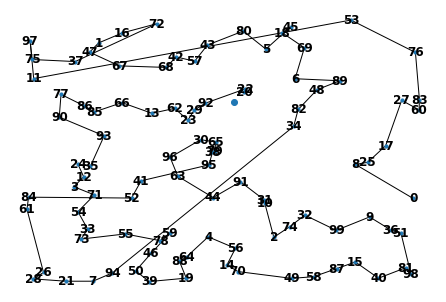

In [56]:
path_graph = nx.Graph(path_info)
nx.draw(path_graph,node_info,with_labels=True,node_size=10)
plt.scatter(a1,a2)

## 三个快递员遍历节点

In [49]:
# 初始化快递员，两两距离小于2时，重新初始化
d1,d2 = random.random()*10,random.random()*10
b1,b2 = random.random()*10,random.random()*10
c1,c2 = random.random()*10,random.random()*10
while (((d1-b1)**2 + (d2-b2)**2)**0.5<3)|(((d1-c1)**2 + (d2-c2)**2)**0.5<3)|(((c1-b1)**2 + (c2-b2)**2)**0.5<3):
    d1,d2 = random.random()*10,random.random()*10
    b1,b2 = random.random()*10,random.random()*10
    c1,c2 = random.random()*10,random.random()*10

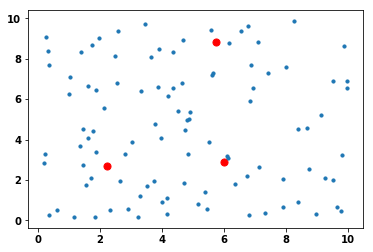

In [50]:
plt.scatter([d1,b1,c1],[d2,b2,c2],color='r',s=50)
plt.scatter(x1,x2,s=10)

In [48]:
# 与上面查找最近点唯一的不同是这里返回了最近距离，便于比较
def find_nearest_node_(begin,node_dict):
    """
    begin:(x,y)
    node_dict{n:(x,y)}
    return nearest_node：n  nearest_distance
    """
    nearest_distance = float('inf')
    nearest_node = None
    for i in node_dict.keys():
        x1,y1 = begin
        x2,y2 = node_dict[i]
        current_distance = ((x1-x2)**2 + (y1-y2)**2)**0.5
        
        if current_distance < nearest_distance:
            nearest_distance = current_distance
            nearest_node = i
    return nearest_node,nearest_distance

In [76]:
path_d = []
path_b = []
path_c = []
node_info_copy_ = copy.deepcopy(node_info)

In [77]:
# 每次扩展离三个快递员最近的点
node_d_pos = (d1,d2)
node_b_pos = (b1,b2)
node_c_pos = (c1,c2)
while len(node_info_copy_):
    node_d_,distance_d = find_nearest_node_(node_d_pos,node_info_copy_)
    node_b_,distance_b = find_nearest_node_(node_b_pos,node_info_copy_)
    node_c_,distance_c = find_nearest_node_(node_c_pos,node_info_copy_)
    if distance_b<distance_c and distance_b<distance_d:
        nearest_node = node_b_
        node_b_pos = node_info_copy_[node_b_]
        path_b.append(nearest_node)
    elif distance_c<distance_b and distance_c<distance_d:
        nearest_node = node_c_
        node_c_pos = node_info_copy_[node_c_]
        path_c.append(nearest_node)
    else:
        nearest_node = node_d_
        node_d_pos = node_info_copy_[node_d_]
        path_d.append(nearest_node)
    node_info_copy_.pop(nearest_node)

In [78]:
path_b,path_c,path_d

([5,
  18,
  45,
  69,
  6,
  48,
  89,
  82,
  34,
  20,
  22,
  57,
  42,
  68,
  67,
  47,
  1,
  16,
  72,
  43,
  80,
  53,
  76,
  83,
  60,
  27,
  17,
  25,
  8,
  0],
 [10,
  31,
  91,
  44,
  63,
  96,
  30,
  65,
  79,
  38,
  95,
  23,
  29,
  92,
  62,
  13,
  66,
  85,
  86,
  77,
  90,
  93,
  35,
  24,
  12,
  3,
  71,
  52,
  41,
  84,
  61,
  26,
  28,
  21,
  7,
  94,
  11,
  75,
  97,
  37],
 [54,
  33,
  73,
  55,
  78,
  59,
  46,
  50,
  39,
  19,
  88,
  64,
  4,
  56,
  14,
  70,
  49,
  58,
  87,
  15,
  40,
  81,
  98,
  51,
  36,
  9,
  99,
  32,
  74,
  2])

In [79]:
# 为三条路径生成关系图
path_info_b = defaultdict(list)
for i in range(len(path_b)-1):
    if i+1<len(path_b):
        path_info_b[path_b[i]].append(path_b[i+1])
        path_info_b[path_b[i+1]].append(path_b[i])
        
path_info_c = defaultdict(list)
for i in range(len(path_c)-1):
    if i+1<len(path_c):
        path_info_c[path_c[i]].append(path_c[i+1])
        path_info_c[path_c[i+1]].append(path_c[i])
        
path_info_d = defaultdict(list)
for i in range(len(path_d)-1):
    if i+1<len(path_d):
        path_info_d[path_d[i]].append(path_d[i+1])
        path_info_d[path_d[i+1]].append(path_d[i])

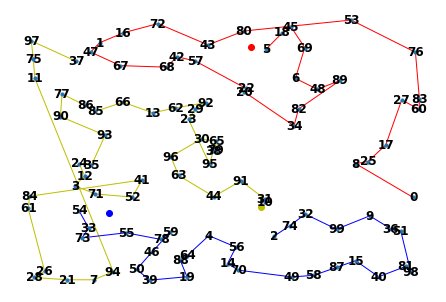

In [85]:
path_graph_b = nx.Graph(path_info_b)
nx.draw(path_graph_b,node_info,with_labels=True,node_size=10,edge_color='r')
plt.scatter(b1,b2,color='r')

path_graph_c = nx.Graph(path_info_c)
nx.draw(path_graph_c,node_info,with_labels=True,node_size=10,edge_color='y')
plt.scatter(c1,c2,color='y')

path_graph_d = nx.Graph(path_info_d)
nx.draw(path_graph_d,node_info,with_labels=True,node_size=10,edge_color='b')
plt.scatter(d1,d2,color='b')